In [1]:
from google.colab import drive
drive.mount('/content/drive')

from pandas.core.frame import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
#from keras.utils import np_utils
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten , Activation, SimpleRNN, LSTM, GRU, Dropout, TimeDistributed, Reshape, Input, Lambda, Add,BatchNormalization
from tensorflow.keras import Sequential
import numpy as np
ub_train=pd.read_csv('/content/drive/MyDrive/UNSW_NB15_split/X_train.csv', header=None)
ub_test=pd.read_csv('/content/drive/MyDrive/UNSW_NB15_split/X_test.csv', header=None)
train_res=pd.read_csv('/content/drive/MyDrive/UNSW_NB15_split/y_train.csv', header=None)
test_res=pd.read_csv('/content/drive/MyDrive/UNSW_NB15_split/y_test.csv', header=None)
ub_train=ub_train.drop([0],axis=1)
ub_train=ub_train.drop([0],axis=0)

ub_test=ub_test.drop([0],axis=1)
ub_test=ub_test.drop([0],axis=0)

train_res=train_res.drop([0],axis=1)
train_res=train_res.drop([0],axis=0)

test_res=test_res.drop([0],axis=1)
test_res=test_res.drop([0],axis=0)

X_train=ub_train
y_train=train_res
X_test=ub_test
y_test=test_res

Mounted at /content/drive


In [2]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
#from sklearn.metrics import plot_confusion_matrix # will plot the confusion matrix
import time
model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score','time to train','time to predict','total time'])

Logistical Classification

In [ ]:
%%time
import math, time, random, datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import missingno
import pickle
from sklearn import model_selection
from sklearn import metrics


from sklearn.linear_model import LogisticRegression
start = time.time()
model = LogisticRegression().fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

<timed exec>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.


In [ ]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Logistic'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

In [ ]:
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix( y_test,y_pred)
from sklearn.metrics import classification_report




cm = confusion_matrix(y_test, y_pred)
#print(cm)
from sklearn.metrics import classification_report
print( classification_report(y_test, y_pred))
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt='0.3f', linewidth = 0.5 , square = True , cbar = False)
plt.ylabel("Prediction Value")
plt.xlabel("Actual Value")
plt
accuracysum=0
for i in range(9):
  accuracysum=accuracysum+cm[i,i]


#Accuracy
accuracysum=0
for i in range(10):
  accuracysum=accuracysum+cm[i,i]

#precision
precision_sum=0
listprecision=[]
for i in range(10):
  fp=0
  tp=cm[i,i]
  if (tp==0) :
    tp=0.0001
  for j in range(10):
    #print(tp)
    if (i!=j) :
      fp=fp+cm[j,i]
  precision_=tp/(tp+fp)
  listprecision.append(precision_)
  #print ("precision_",i,"=",precision_)
  precision_sum=precision_sum+precision_
precision_sum= precision_sum/10
#recall
recall_sum=0
listrecall=[]
for i in range(10):
  fn=0
  tp=cm[i,i]
  if (tp==0) :
    tp=0.0001
  for j in range(10):
    #print(tp)
    if (i!=j) :
      fn=fn+cm[i,j]
  recall_=tp/(tp+fn)
  listrecall.append(recall_)
  #print ("recall",i,"=",recall_)
  recall_sum=recall_sum+recall_
recall_sum=recall_sum/10
#f1_score
listf=[]
sumf=0
for i in range(10):
  f=2*((listprecision[i]*listrecall[i])/(listprecision[i]+listrecall[i]))
  listf.append(f)
  sumf=sumf+f

listf
print('accuracy =',accuracysum/617393)
print ("recall_sum = ",recall_sum )
print ("precision_sum = ",precision_sum)
print('f1 score =',sumf/10)

naive_bayes

In [ ]:
%%time
from  sklearn.naive_bayes  import GaussianNB
start = time.time()
model = GaussianNB().fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: user 2.24 s, sys: 642 ms, total: 2.88 s
Wall time: 2.88 s


In [ ]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['kNN'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 86.86%
Recall: 86.86%
Precision: 96.16%
F1-Score: 91.16%
time to train: 1.25 s
time to predict: 1.62 s
total: 2.88 s


              precision    recall  f1-score   support

           0       0.04      0.07      0.05       618
           1       0.04      0.70      0.08       601
           2       0.01      0.02      0.01      1730
           3       0.14      0.17      0.15      8194
           4       0.19      0.13      0.16      6441
           5       0.43      0.53      0.48      7573
           6       1.00      0.90      0.95    587777
           7       0.06      0.15      0.08      3943
           8       0.02      0.99      0.04       456
           9       0.00      0.25      0.00        60

    accuracy                           0.87    617393
   macro avg       0.19      0.39      0.20    617393
weighted avg       0.96      0.87      0.91    617393

accuracy = 0.8686347269891301
recall_sum =  0.3922707241682776
precision_sum =  0.1926875305742975
f1 score = 0.1997116835817125


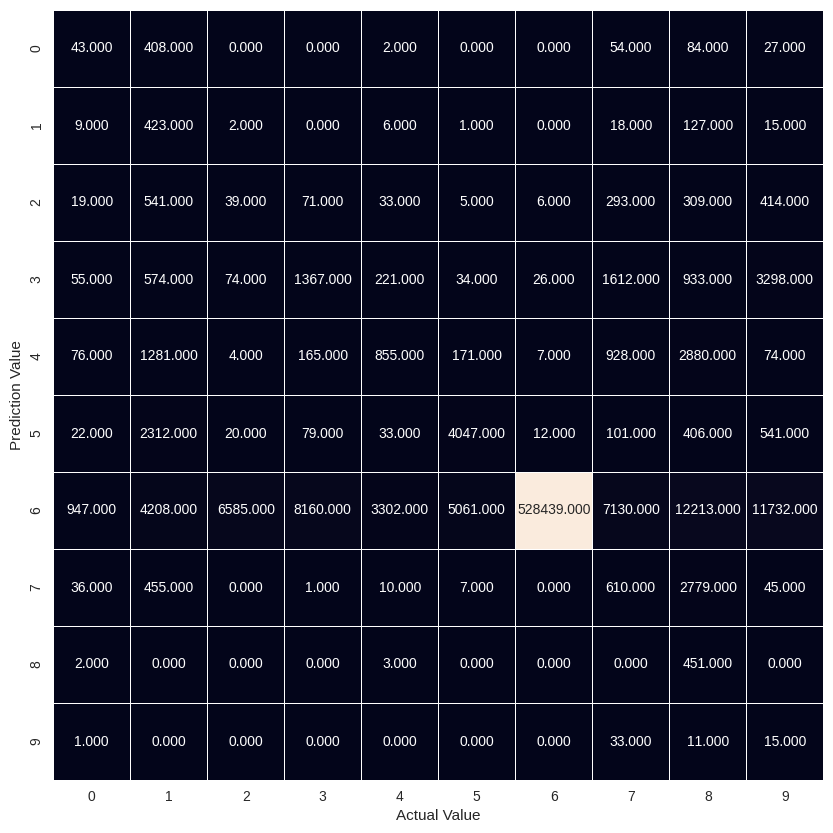

In [ ]:
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix( y_test,y_pred)
from sklearn.metrics import classification_report




cm = confusion_matrix(y_test, y_pred)
#print(cm)
from sklearn.metrics import classification_report
print( classification_report(y_test, y_pred))
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt='0.3f', linewidth = 0.5 , square = True , cbar = False)
plt.ylabel("Prediction Value")
plt.xlabel("Actual Value")
plt
accuracysum=0
for i in range(9):
  accuracysum=accuracysum+cm[i,i]


#Accuracy
accuracysum=0
for i in range(10):
  accuracysum=accuracysum+cm[i,i]

#precision
precision_sum=0
listprecision=[]
for i in range(10):
  fp=0
  tp=cm[i,i]
  if (tp==0) :
    tp=0.0001
  for j in range(10):
    #print(tp)
    if (i!=j) :
      fp=fp+cm[j,i]
  precision_=tp/(tp+fp)
  listprecision.append(precision_)
  #print ("precision_",i,"=",precision_)
  precision_sum=precision_sum+precision_
precision_sum= precision_sum/10
#recall
recall_sum=0
listrecall=[]
for i in range(10):
  fn=0
  tp=cm[i,i]
  if (tp==0) :
    tp=0.0001
  for j in range(10):
    #print(tp)
    if (i!=j) :
      fn=fn+cm[i,j]
  recall_=tp/(tp+fn)
  listrecall.append(recall_)
  #print ("recall",i,"=",recall_)
  recall_sum=recall_sum+recall_
recall_sum=recall_sum/10
#f1_score
listf=[]
sumf=0
for i in range(10):
  f=2*((listprecision[i]*listrecall[i])/(listprecision[i]+listrecall[i]))
  listf.append(f)
  sumf=sumf+f

listf
print('accuracy =',accuracysum/617393)
print ("recall_sum = ",recall_sum )
print ("precision_sum = ",precision_sum)
print('f1 score =',sumf/10)

Decision Tree

In [ ]:
%%time
from sklearn.tree import DecisionTreeClassifier
start = time.time()
model = DecisionTreeClassifier().fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: user 11.1 s, sys: 25.6 ms, total: 11.1 s
Wall time: 15.3 s


In [ ]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Decision Tree'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 98.30%
Recall: 98.30%
Precision: 98.56%
F1-Score: 98.42%
time to train: 14.88 s
time to predict: 0.09 s
total: 14.97 s


              precision    recall  f1-score   support

           0       0.03      0.11      0.05       618
           1       0.06      0.09      0.07       601
           2       0.25      0.25      0.25      1730
           3       0.78      0.74      0.76      8194
           4       0.70      0.68      0.69      6441
           5       0.95      0.88      0.91      7573
           6       1.00      1.00      1.00    587777
           7       0.90      0.78      0.84      3943
           8       0.56      0.54      0.55       456
           9       0.43      0.32      0.37        60

    accuracy                           0.98    617393
   macro avg       0.57      0.54      0.55    617393
weighted avg       0.99      0.98      0.98    617393

accuracy = 0.9830173001637531
recall_sum =  0.5386102742361716
precision_sum =  0.5657082523067652
f1 score = 0.5479314808095123


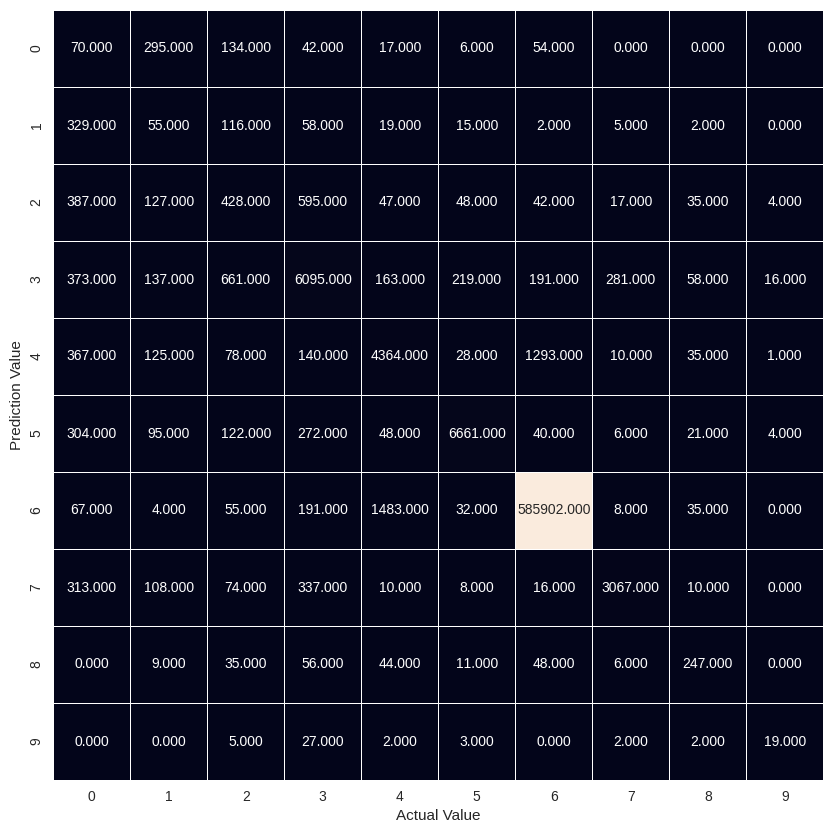

In [ ]:
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix( y_test,y_pred)
from sklearn.metrics import classification_report




cm = confusion_matrix(y_test, y_pred)
#print(cm)
from sklearn.metrics import classification_report
print( classification_report(y_test, y_pred))
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt='0.3f', linewidth = 0.5 , square = True , cbar = False)
plt.ylabel("Prediction Value")
plt.xlabel("Actual Value")
plt
accuracysum=0
for i in range(9):
  accuracysum=accuracysum+cm[i,i]


#Accuracy
accuracysum=0
for i in range(10):
  accuracysum=accuracysum+cm[i,i]

#precision
precision_sum=0
listprecision=[]
for i in range(10):
  fp=0
  tp=cm[i,i]
  if (tp==0) :
    tp=0.0001
  for j in range(10):
    #print(tp)
    if (i!=j) :
      fp=fp+cm[j,i]
  precision_=tp/(tp+fp)
  listprecision.append(precision_)
  #print ("precision_",i,"=",precision_)
  precision_sum=precision_sum+precision_
precision_sum= precision_sum/10
#recall
recall_sum=0
listrecall=[]
for i in range(10):
  fn=0
  tp=cm[i,i]
  if (tp==0) :
    tp=0.0001
  for j in range(10):
    #print(tp)
    if (i!=j) :
      fn=fn+cm[i,j]
  recall_=tp/(tp+fn)
  listrecall.append(recall_)
  #print ("recall",i,"=",recall_)
  recall_sum=recall_sum+recall_
recall_sum=recall_sum/10
#f1_score
listf=[]
sumf=0
for i in range(10):
  f=2*((listprecision[i]*listrecall[i])/(listprecision[i]+listrecall[i]))
  listf.append(f)
  sumf=sumf+f

listf
print('accuracy =',accuracysum/617393)
print ("recall_sum = ",recall_sum )
print ("precision_sum = ",precision_sum)
print('f1 score =',sumf/10)

Extra Trees

In [ ]:
%%time
from sklearn.ensemble import ExtraTreesClassifier
start = time.time()
model = ExtraTreesClassifier(random_state=0,n_jobs=-1).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: user 4min 49s, sys: 2.06 s, total: 4min 51s
Wall time: 2min 55s


In [ ]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Extra Trees'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 98.42%
Recall: 98.42%
Precision: 98.55%
F1-Score: 98.45%
time to train: 164.25 s
time to predict: 11.52 s
total: 175.77 s


              precision    recall  f1-score   support

           0       0.00      0.02      0.01       618
           1       0.05      0.08      0.06       601
           2       0.23      0.09      0.13      1730
           3       0.76      0.85      0.80      8194
           4       0.76      0.66      0.70      6441
           5       0.98      0.85      0.91      7573
           6       1.00      1.00      1.00    587777
           7       0.89      0.75      0.81      3943
           8       0.63      0.48      0.54       456
           9       0.50      0.03      0.06        60

    accuracy                           0.98    617393
   macro avg       0.58      0.48      0.50    617393
weighted avg       0.99      0.98      0.98    617393

accuracy = 0.9841527195805589
recall_sum =  0.4797481911695246
precision_sum =  0.5793700387088656
f1 score = 0.5028125954564144


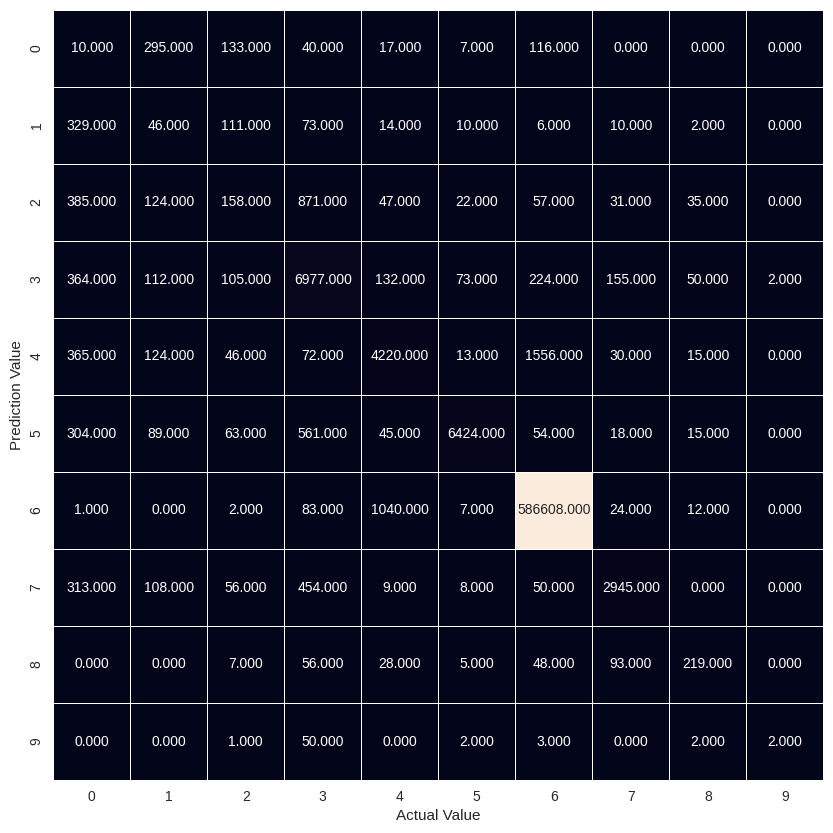

In [ ]:
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix( y_test,y_pred)
from sklearn.metrics import classification_report




cm = confusion_matrix(y_test, y_pred)
#print(cm)
from sklearn.metrics import classification_report
print( classification_report(y_test, y_pred))
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt='0.3f', linewidth = 0.5 , square = True , cbar = False)
plt.ylabel("Prediction Value")
plt.xlabel("Actual Value")
plt
accuracysum=0
for i in range(9):
  accuracysum=accuracysum+cm[i,i]


#Accuracy
accuracysum=0
for i in range(10):
  accuracysum=accuracysum+cm[i,i]

#precision
precision_sum=0
listprecision=[]
for i in range(10):
  fp=0
  tp=cm[i,i]
  if (tp==0) :
    tp=0.0001
  for j in range(10):
    #print(tp)
    if (i!=j) :
      fp=fp+cm[j,i]
  precision_=tp/(tp+fp)
  listprecision.append(precision_)
  #print ("precision_",i,"=",precision_)
  precision_sum=precision_sum+precision_
precision_sum= precision_sum/10
#recall
recall_sum=0
listrecall=[]
for i in range(10):
  fn=0
  tp=cm[i,i]
  if (tp==0) :
    tp=0.0001
  for j in range(10):
    #print(tp)
    if (i!=j) :
      fn=fn+cm[i,j]
  recall_=tp/(tp+fn)
  listrecall.append(recall_)
  #print ("recall",i,"=",recall_)
  recall_sum=recall_sum+recall_
recall_sum=recall_sum/10
#f1_score
listf=[]
sumf=0
for i in range(10):
  f=2*((listprecision[i]*listrecall[i])/(listprecision[i]+listrecall[i]))
  listf.append(f)
  sumf=sumf+f

listf
print('accuracy =',accuracysum/617393)
print ("recall_sum = ",recall_sum )
print ("precision_sum = ",precision_sum)
print('f1 score =',sumf/10)

Random Forest

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier
start = time.time()
model = RandomForestClassifier(n_estimators = 100,n_jobs=-1,random_state=0,bootstrap=True,).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: user 6min 47s, sys: 1.73 s, total: 6min 48s
Wall time: 4min 1s


In [ ]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Random Forest'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 98.52%
Recall: 98.52%
Precision: 98.41%
F1-Score: 98.45%
time to train: 235.37 s
time to predict: 6.05 s
total: 241.42 s


              precision    recall  f1-score   support

           0       0.05      0.04      0.04       618
           1       0.11      0.10      0.10       601
           2       0.28      0.14      0.19      1730
           3       0.76      0.85      0.80      8194
           4       0.71      0.66      0.69      6441
           5       0.92      0.88      0.90      7573
           6       1.00      1.00      1.00    587777
           7       0.79      0.78      0.79      3943
           8       0.64      0.66      0.65       456
           9       0.40      0.03      0.06        60

    accuracy                           0.99    617393
   macro avg       0.56      0.51      0.52    617393
weighted avg       0.98      0.99      0.98    617393

accuracy = 0.9851553224607341
recall_sum =  0.5146887318495319
precision_sum =  0.5649493833366301
f1 score = 0.5215533456573725


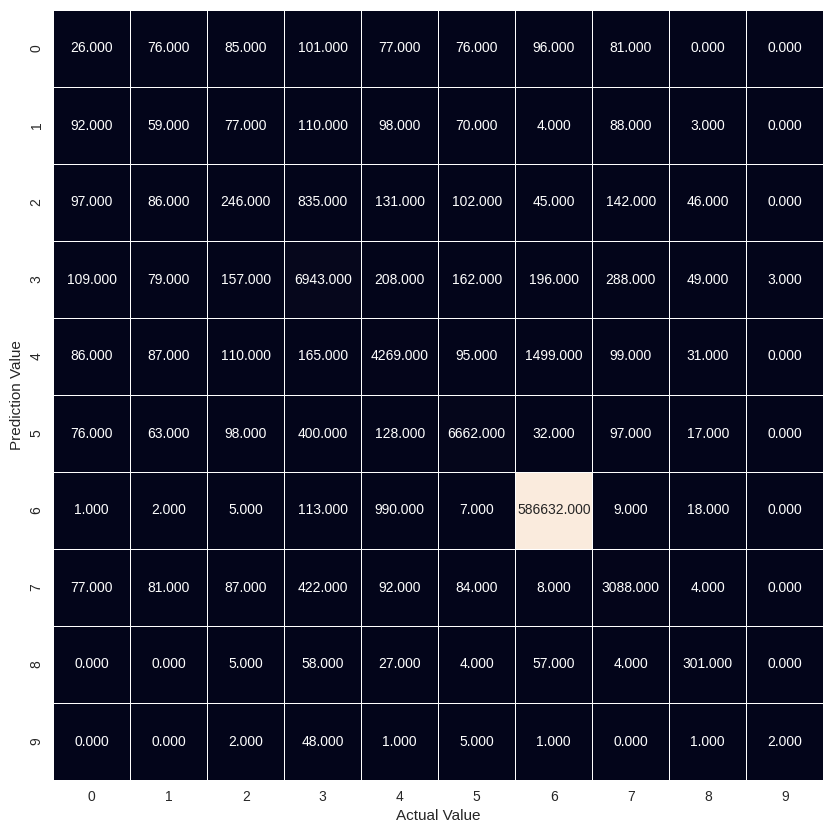

In [ ]:
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix( y_test,y_pred)
from sklearn.metrics import classification_report




cm = confusion_matrix(y_test, y_pred)
#print(cm)
from sklearn.metrics import classification_report
print( classification_report(y_test, y_pred))
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt='0.3f', linewidth = 0.5 , square = True , cbar = False)
plt.ylabel("Prediction Value")
plt.xlabel("Actual Value")
plt
accuracysum=0
for i in range(9):
  accuracysum=accuracysum+cm[i,i]


#Accuracy
accuracysum=0
for i in range(10):
  accuracysum=accuracysum+cm[i,i]

#precision
precision_sum=0
listprecision=[]
for i in range(10):
  fp=0
  tp=cm[i,i]
  if (tp==0) :
    tp=0.0001
  for j in range(10):
    #print(tp)
    if (i!=j) :
      fp=fp+cm[j,i]
  precision_=tp/(tp+fp)
  listprecision.append(precision_)
  #print ("precision_",i,"=",precision_)
  precision_sum=precision_sum+precision_
precision_sum= precision_sum/10
#recall
recall_sum=0
listrecall=[]
for i in range(10):
  fn=0
  tp=cm[i,i]
  if (tp==0) :
    tp=0.0001
  for j in range(10):
    #print(tp)
    if (i!=j) :
      fn=fn+cm[i,j]
  recall_=tp/(tp+fn)
  listrecall.append(recall_)
  #print ("recall",i,"=",recall_)
  recall_sum=recall_sum+recall_
recall_sum=recall_sum/10
#f1_score
listf=[]
sumf=0
for i in range(10):
  f=2*((listprecision[i]*listrecall[i])/(listprecision[i]+listrecall[i]))
  listf.append(f)
  sumf=sumf+f

listf
print('accuracy =',accuracysum/617393)
print ("recall_sum = ",recall_sum )
print ("precision_sum = ",precision_sum)
print('f1 score =',sumf/10)

Gradient Boosting Classifier

In [ ]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
start = time.time()
model = GradientBoostingClassifier().fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 4h 2min 36s, sys: 1min 14s, total: 4h 3min 51s
Wall time: 4h 4min 33s
